In [1]:
from qulacs import Observable, QuantumCircuit, QuantumState, ParametricQuantumCircuit,QuantumCircuitSimulator
from qulacs.gate import Y,CNOT,merge

In [2]:
import numpy as np

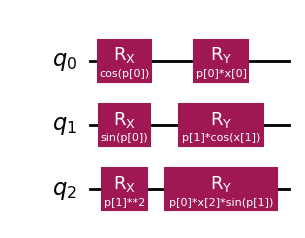

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector


p = ParameterVector('p',2)
x = ParameterVector('x',3)

qc = QuantumCircuit(3)

qc.rx(np.cos(p[0]),0)
qc.rx(np.sin(p[0]),1)
qc.rx(p[1]*p[1],2)

qc.ry(p[0]*x[0],0)
qc.ry(p[1]*np.cos(x[1]),1)
qc.ry(p[0]*np.sin(p[1])*x[2],2)

#qc.rx(np.cos(p[0]),0)
#qc.rx(np.sin(p[1]),1)
#qc.rx(2.0*p[2],2)


#from qiskit.circuit.random import random_circuit
#qc = random_circuit(3, 10, seed=41)
qc.draw()

In [4]:
# from squlearn.encoding_circuit import HubregtsenEncodingCircuit
# from qiskit.circuit import ParameterVector



# pqc = HubregtsenEncodingCircuit(3,2,2)

# p = ParameterVector('p',3)
# x = ParameterVector('x',pqc.num_features)

# qc = pqc.get_circuit(p,x)
# qc.draw()

In [5]:
np.random.seed(0)
param = np.random.random(2)
x_val = np.random.random(3)
param_obs = np.random.random(8)

#print(pqc.num_parameters)
#print(pqc.num_features)

In [6]:
from squlearn.observables import SummedPaulis

obs = SummedPaulis(3,)

obs.get_operator(ParameterVector('p',4))

SparsePauliOp(['III', 'IIZ', 'IZI', 'ZII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3])])

In [7]:
from qiskit.quantum_info import SparsePauliOp

p_obs = ParameterVector('p_obs',8)

obs = SparsePauliOp('ZZZ',)

obs2= [
    SparsePauliOp('IIZ',p_obs[0])+SparsePauliOp('IZI',p_obs[1])+SparsePauliOp('ZII',p_obs[2]),
    SparsePauliOp('IIX',p_obs[3])+SparsePauliOp('IXI',p_obs[4])+SparsePauliOp('XII',p_obs[5]),
    SparsePauliOp('IIY',p_obs[6])+SparsePauliOp('IYI',p_obs[7]),
]

In [8]:
#obs2[0].parameters

In [9]:

from squlearn.util.qulacs import *



test = QulacsCircuit(qc, obs2)


print("test._operation_list",test._operation_list)
print("test._param_list",test._param_list)
print("test._qubit_list",test._qubit_list)
print("test._func_list",test._func_list)
print("test._func_grad_list",test._func_grad_list)
print("test._used_parameters",test._used_parameters)

print("test._operators_imag",test._operators_imag)
print("test._operators_real",test._operators_real)
print("test._operators_param",test._operators_param)
print("test._operators_func",test._operators_param_func)

test._operation_list ['rx', 'ry', 'rx', 'ry', 'rx', 'ry']
test._param_list []
test._qubit_list [[0], [0], [1], [1], [2], [2]]
test._func_list [<function _lambdifygenerated at 0x000002609E5A0670>, <function _lambdifygenerated at 0x000002609E5A04C0>, <function _lambdifygenerated at 0x000002609E5ACF70>, <function _lambdifygenerated at 0x000002609E5A8040>, <function _lambdifygenerated at 0x000002609E5A0820>, <function _lambdifygenerated at 0x000002609E5ACD30>]
test._func_grad_list [[<function _lambdifygenerated at 0x000002609E5A83A0>], [<function _lambdifygenerated at 0x000002609E5A8670>, <function _lambdifygenerated at 0x000002609E5AC3A0>], [<function _lambdifygenerated at 0x000002609E5AC5E0>], [<function _lambdifygenerated at 0x000002609E5A0280>, <function _lambdifygenerated at 0x000002609E5A0310>], [<function _lambdifygenerated at 0x000002609E5A8160>], [<function _lambdifygenerated at 0x000002609E5AC700>, <function _lambdifygenerated at 0x000002609E5ACDC0>, <function _lambdifygenerated 

In [10]:
test.get_circuit_func()

<function squlearn.util.qulacs.qulacs_circuit.QulacsCircuit.get_circuit_func.<locals>.qulacs_circuit(*args)>

In [11]:
test._qualcs_obs_parameters

['p_obs']

In [12]:
from squlearn.util.qulacs .qulacs_circuit import evaluate_circuit

evaluate_circuit(test,param,x_val,param_obs)

Adding RX gate with angle -0.8531440881779586 on qubit 0
Adding RY gate with angle -0.33080468046094264 on qubit 0
Adding RX gate with angle -0.5216753442582844 on qubit 1
Adding RY gate with angle -0.6116212529902647 on qubit 1
Adding RX gate with angle -0.5114958297721829 on qubit 2
Adding RY gate with angle -0.15246919338440731 on qubit 2


array([ 1.48094534,  0.50157662, -0.68151945])

In [13]:
from squlearn.util.qulacs.qulacs_circuit import evaluate_circuit_gradient

px = list(p)+list(x)

evaluate_circuit_gradient(test,p,param,x_val,param_obs)

Adding Parameterized RX gate with angle -0.8531440881779586 on qubit 0
Adding Parameterized RY gate with angle -0.33080468046094264 on qubit 0
Adding Parameterized RX gate with angle -0.5216753442582844 on qubit 1
Adding Parameterized RY gate with angle -0.6116212529902647 on qubit 1
Adding Parameterized RX gate with angle -0.5114958297721829 on qubit 2
Adding Parameterized RY gate with angle -0.15246919338440731 on qubit 2
outer_jacobian
 [[ 0.52167534  0.        ]
 [-0.60276338  0.        ]
 [-0.85314409  0.        ]
 [ 0.         -0.85518784]
 [ 0.         -1.43037873]
 [-0.27781604 -0.17553595]]


array([[-2.82076552e-02, -8.24152611e-01],
       [ 5.80256988e-01,  2.68352451e-01],
       [-2.38717594e-01,  9.97638867e-17]])

In [14]:
evaluate_circuit_gradient(test,x,param,x_val,param_obs)

Adding RX gate with angle -0.8531440881779586 on qubit 0
Adding Parameterized RY gate with angle -0.33080468046094264 on qubit 0
Adding RX gate with angle -0.5216753442582844 on qubit 1
Adding Parameterized RY gate with angle -0.6116212529902647 on qubit 1
Adding RX gate with angle -0.5114958297721829 on qubit 2
Adding Parameterized RY gate with angle -0.15246919338440731 on qubit 2
outer_jacobian
 [[-0.5488135   0.          0.        ]
 [ 0.          0.37069566  0.        ]
 [ 0.          0.         -0.35989016]]


array([[-7.57148888e-02,  8.07520950e-02, -4.25055397e-02],
       [ 3.28938069e-01, -1.00893436e-01,  2.45583843e-01],
       [ 2.25370124e-17, -1.68918819e-17,  1.10430622e-17]])

In [15]:
evaluate_circuit_gradient(test,x[1],param,x_val,param_obs)

Adding RX gate with angle -0.8531440881779586 on qubit 0
Adding RY gate with angle -0.33080468046094264 on qubit 0
Adding RX gate with angle -0.5216753442582844 on qubit 1
Adding Parameterized RY gate with angle -0.6116212529902647 on qubit 1
Adding RX gate with angle -0.5114958297721829 on qubit 2
Adding RY gate with angle -0.15246919338440731 on qubit 2
outer_jacobian
 [[0.37069566]]


array([[ 8.07520950e-02],
       [-1.00893436e-01],
       [-1.68918819e-17]])

In [16]:
evaluate_circuit_gradient(test,px,param,x_val,param_obs)

Adding Parameterized RX gate with angle -0.8531440881779586 on qubit 0
Adding Parameterized RY gate with angle -0.33080468046094264 on qubit 0
Adding Parameterized RX gate with angle -0.5216753442582844 on qubit 1
Adding Parameterized RY gate with angle -0.6116212529902647 on qubit 1
Adding Parameterized RX gate with angle -0.5114958297721829 on qubit 2
Adding Parameterized RY gate with angle -0.15246919338440731 on qubit 2
outer_jacobian
 [[ 0.52167534  0.          0.          0.          0.        ]
 [-0.60276338  0.         -0.5488135   0.          0.        ]
 [-0.85314409  0.          0.          0.          0.        ]
 [ 0.         -0.85518784  0.          0.37069566  0.        ]
 [ 0.         -1.43037873  0.          0.          0.        ]
 [-0.27781604 -0.17553595  0.          0.         -0.35989016]]


array([[-2.82076552e-02, -8.24152611e-01, -7.57148888e-02,
         8.07520950e-02, -4.25055397e-02],
       [ 5.80256988e-01,  2.68352451e-01,  3.28938069e-01,
        -1.00893436e-01,  2.45583843e-01],
       [-2.38717594e-01,  9.97638867e-17,  2.25370124e-17,
        -1.68918819e-17,  1.10430622e-17]])

In [17]:
from squlearn.util.qulacs.qulacs_circuit import evaluate_operator_gradient

evaluate_operator_gradient(test,p_obs,param,x_val,param_obs)

Adding RX gate with angle -0.8531440881779586 on qubit 0
Adding RY gate with angle -0.33080468046094264 on qubit 0
Adding RX gate with angle -0.5216753442582844 on qubit 1
Adding RY gate with angle -0.6116212529902647 on qubit 1
Adding RX gate with angle -0.5114958297721829 on qubit 2
Adding RY gate with angle -0.15246919338440731 on qubit 2


array([[ 0.6219626 ,  0.7098168 ,  0.86189714,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.21359701,  0.49781924,
         0.13244063,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.75335173, -0.49833334]])

In [18]:
from squlearn.qnn.lowlevel_qnn_pennylane import LowLevelQNNPennyLane
from squlearn import Executor
from squlearn.observables import CustomObservable

from squlearn.encoding_circuit import QiskitEncodingCircuit

ec = QiskitEncodingCircuit(qc)
o1 = CustomObservable(3,'IIZ',parameterized=True)+CustomObservable(3,'IZI',parameterized=True)+CustomObservable(3,'ZII',parameterized=True)
o2 = CustomObservable(3,'IIX',parameterized=True)+CustomObservable(3,'IXI',parameterized=True)+CustomObservable(3,'XII',parameterized=True)
o3 = CustomObservable(3,'IIY',parameterized=True)+CustomObservable(3,'IYI',parameterized=True)#+CustomObservable(3,'YII',parameterized=True)

qnn = LowLevelQNNPennyLane(ec,[o1,o2,o3],Executor('pennylane'))


print("f\n",qnn.evaluate(x_val,param,param_obs,"f")["f"])
print("dfdp\n",qnn.evaluate(x_val,param,param_obs,"dfdp")["dfdp"])
print("dfdx\n",qnn.evaluate(x_val,param,param_obs,"dfdx")["dfdx"])
print("dfdop\n",qnn.evaluate(x_val,param,param_obs,"dfdop")["dfdop"])
print("x[1]\n",qnn.evaluate(x_val,param,param_obs,x[1])[x[1]])
print("dop[0]\n",qnn.evaluate(x_val,param,param_obs,qnn.parameters_operator[0])[qnn.parameters_operator[0]])

f
 [ 1.48094534  0.50157662 -0.68151945]
dfdp
 [[-2.82076552e-02 -8.24152611e-01]
 [ 5.80256988e-01  2.68352451e-01]
 [-2.38717594e-01  2.13001802e-17]]
dfdx
 [[-7.57148888e-02  8.07520950e-02 -4.25055397e-02]
 [ 3.28938069e-01 -1.00893436e-01  2.45583843e-01]
 [ 0.00000000e+00 -1.02888714e-17 -4.99447927e-18]]
dfdop
 [[ 0.6219626   0.7098168   0.86189714  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.21359701  0.49781924  0.13244063
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.75335173 -0.49833334]]
x[1]
 [[ 8.07520950e-02]
 [-1.00893436e-01]
 [-1.02888714e-17]]
dop[0]
 [[0.6219626]
 [0.       ]
 [0.       ]]
